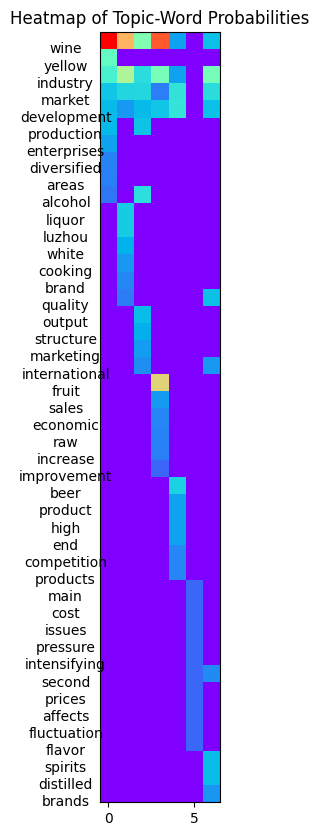

In [3]:

# -*- coding: utf-8 -*-
# pip install scikit-learn
# 2023 Alcohol Industry Economic Operation Report.txt

import re
import gensim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Load the text file
file_path = "2023 Alcohol Industry Economic Operation Report.txt"
with open(file_path, 'r', encoding='utf-8') as f:
    documents = f.readlines()

# Function to remove specific keywords
def remove_keywords(text):
    keywords = ['Abstract', 'Keywords', 'SEP']
    for kw in keywords:
        text = re.sub(r'\b' + kw + r'\b', '', text)
    return text

# Preprocess text, removing stopwords and non-alphabetic words
def preprocess_text(text):
    text = remove_keywords(text)
    return [word for word in gensim.utils.simple_preprocess(text) if word not in ENGLISH_STOP_WORDS and word.isalpha()]

# Preprocess all documents
processed_docs = [preprocess_text(doc) for doc in documents]

# Create dictionary and document-term matrix
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Number of topics
num_topics = 7

# Train LDA model using gensim
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=50, random_state=3154)

# Print topics
topicWordProbMat = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)

# Create the DataFrame for the heatmap
columns = ['Topic ' + str(x) for x in range(1, num_topics + 1)]
df = pd.DataFrame(columns=columns)
DC = {}  # Dictionary to map words to row indices
zz = np.zeros((100, num_topics))
last_number = 0

# Populate the DataFrame and the probability matrix
for topic_id, words_probs in topicWordProbMat:
    for word, prob in words_probs:
        word = word.strip()
        if word in DC:
            zz[DC[word], topic_id] = prob
        else:
            zz[last_number, topic_id] = prob
            DC[word] = last_number
            last_number += 1

# Resize the matrix to match the actual number of words
zz = np.resize(zz, (len(DC.keys()), zz.shape[1]))

# Plotting the heatmap
plt.figure(figsize=(20, 10))
plt.imshow(zz, cmap='rainbow', interpolation='nearest')

# Annotate the heatmap with words
for val, key in enumerate(DC.keys()):
    plt.text(-2.5, val + 0.5, key, horizontalalignment='center', verticalalignment='center')

# Set title and remove y-ticks (since we'll annotate manually)
plt.title("Heatmap of Topic-Word Probabilities")
plt.yticks([])

# Save the heatmap to a file
plt.savefig("heatmap_abstract.png", transparent=True, dpi=400)

# Show the plot
plt.show()